# Classifying handwritten digits using the SVD

## Load data from the MNIST data set

In [1]:
using Flux
using Flux.Data.MNIST

In [2]:
labels = MNIST.labels();
images = MNIST.images(); 

In [ ]:
using Pkg
Pkg.add("ImageShow")

In [8]:
using ImageShow

Let's see what the images look like:

,,,,

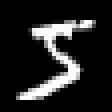
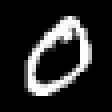
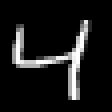
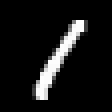
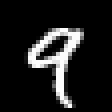

In [9]:
images[1:5]

,,,,
,,,,
,,,,
,,,,
,,,,

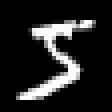
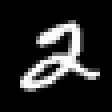
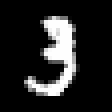
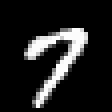
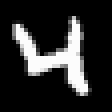
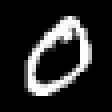
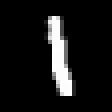
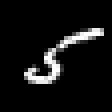
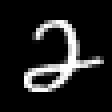
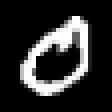
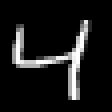
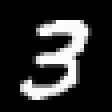
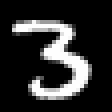
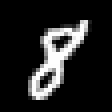
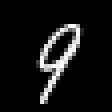
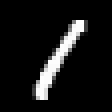
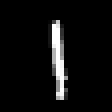
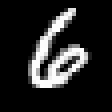
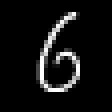
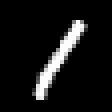
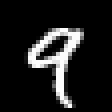
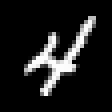
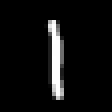
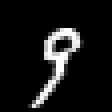
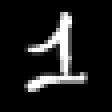

In [10]:
reshape(images[1:25], 5, 5)

In [11]:
using Interact

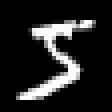

In [12]:
images[1]

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:i=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
30000), Observable{Int64} with 2 listeners. Value:
30000, Scope("knockout-component-5fa84eee-c13c-4ed2-a652-fa2ef389a925", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>60000,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
30000, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/dpsanders/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":30000}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-5fa84eee-c13c-4ed2-a652-fa2ef389a925\",\"id\":\"ob_07\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-5fa84eee-c13c-4ed2-a652-fa2ef389a925\",\"id\":\"ob_06\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n   
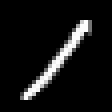
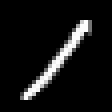

In [13]:
@manipulate for i in eachindex(images)
    hbox(images[i], hskip(1em), string("label: ", labels[i]))
end

## An image is just data

In [14]:
a = vec(images[2][10, :]);

In [15]:
b = round.(Int, 256*images[2][10, i].val for i in 1:28);

In [16]:
a[1]

In [17]:
b[1]

0

In [18]:
@manipulate for j in 1:28
    a = vec(images[2][j, :])
    b = round.(Int, 256*images[2][j, i].val for i in 1:28);
    hbox([vbox(a[i], string(" ", b[i], " " )) for i in 1:28])
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:j=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
14), Observable{Int64} with 2 listeners. Value:
14, Scope("knockout-component-4c8d6807-9f87-4125-9d4e-a67c9bfbfad7", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["j"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>28,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
14, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/dpsanders/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":14}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-4c8d6807-9f87-4125-9d4e-a67c9bfbfad7\",\"id\":\"ob_12\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-4c8d6807-9f87-4125-9d4e-a67c9bfbfad7\",\"id\":\"ob_11\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n 

In [19]:
@manipulate for j in 1:28
    a = vec(images[2][j, :])
    b = round.(Int, 256*images[2][j, i].val for i in 1:28);
    
    hbox([vbox(a[i], string(b[i])) for i in 1:28])
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:j=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
14), Observable{Int64} with 2 listeners. Value:
14, Scope("knockout-component-62dc341a-1be1-4d20-b32b-13dfb432d4fb", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["j"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>28,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
14, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/dpsanders/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":14}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-62dc341a-1be1-4d20-b32b-13dfb432d4fb\",\"id\":\"ob_17\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-62dc341a-1be1-4d20-b32b-13dfb432d4fb\",\"id\":\"ob_16\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }\n 

In [20]:
@manipulate for start in 1:28^2 - 28
    a = vec(images[2][start:start+27])
    b = round.(Int, 256*images[2][i].val for i in start:start+27);
    
    hbox([vbox(a[i], hbox(hskip(0.5em), string(b[i]))) for i in 1:28])
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:start=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
378), Observable{Int64} with 2 listeners. Value:
378, Scope("knockout-component-a35cac00-eadf-457d-9e0c-e883a85ee7ed", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["start"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>756,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
378, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/dpsanders/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":378}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-a35cac00-eadf-457d-9e0c-e883a85ee7ed\",\"id\":\"ob_22\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-a35cac00-eadf-457d-9e0c-e883a85ee7ed\",\"id\":\"ob_21\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n     

## Collect all the data into a matrix

Let's collect all the data into a matrix. We take 50000 images as our training set:

In [21]:
training_size = 50000

training_images = images[1:training_size]
training_labels = labels[1:training_size];

For example, let's look at the images of 0s:

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

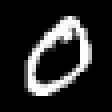
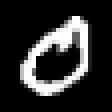
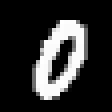
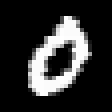
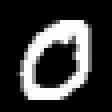
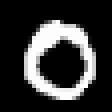
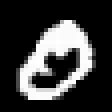
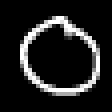
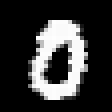
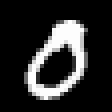
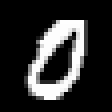
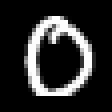
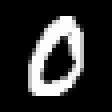
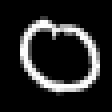
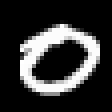
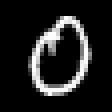
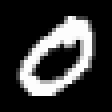
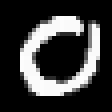
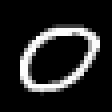
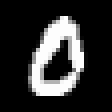
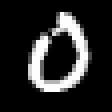
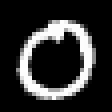
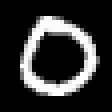
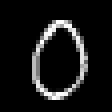
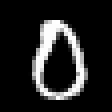
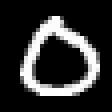
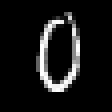
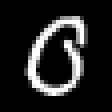
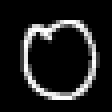
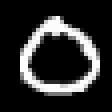
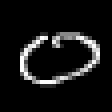
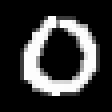
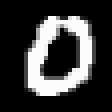
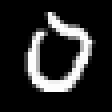
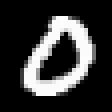
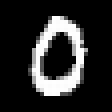
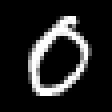
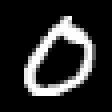
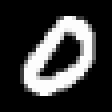
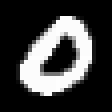
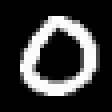
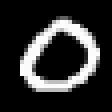
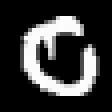
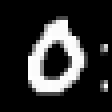
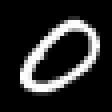
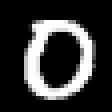
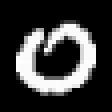
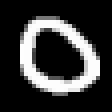
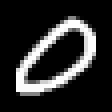
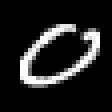
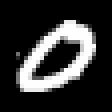
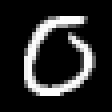
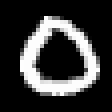
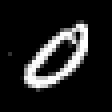
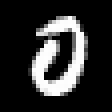
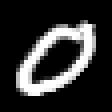
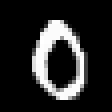
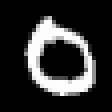
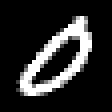
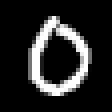
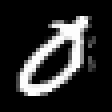
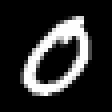
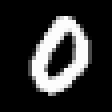
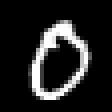
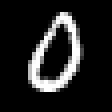
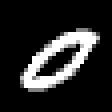
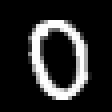
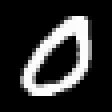
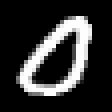
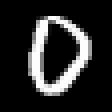
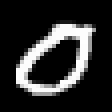
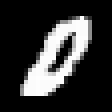
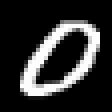
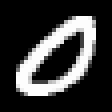
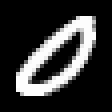
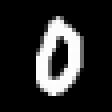
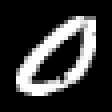
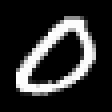
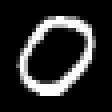
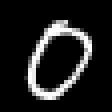
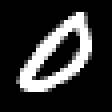
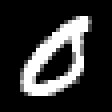
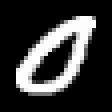
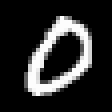
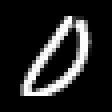
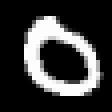
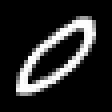
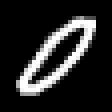
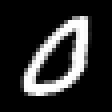
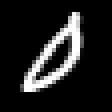
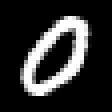
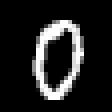
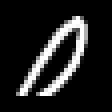
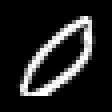
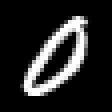
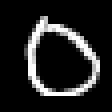
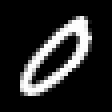
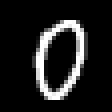
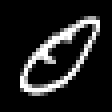
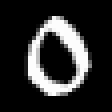

In [22]:
images_0 = training_images[training_labels .== 0];
images_0[1:100]

In [23]:
length(images_0)

4932

Let's check that the numerical SVD gives the correct result for the 0 images:

In [24]:
function vectorize(image) 
    return round.(Int, 256*image[i].val for i in eachindex(image))
end

vectorize (generic function with 1 method)

In [25]:
show(vectorize(images[2]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 76, 85, 85, 85, 86, 85, 85, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 57, 199, 247, 253, 253, 253, 254, 253, 253, 200, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38, 179, 253, 254, 253, 231, 224, 146, 226, 250, 253, 253, 129, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 166, 253, 253, 191, 112, 25, 0, 0, 0, 147, 253, 253, 253, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 239, 254, 241, 63, 0, 0, 0, 0, 0, 0, 48, 230, 254, 254,

In [26]:
matrix_0s = reduce(hcat, vectorize.(images_0));

In [27]:
using LinearAlgebra

U, Σ, V = svd(matrix_0s)

SVD{Float64,Float64,Array{Float64,2}}([-1.11022e-16 -8.32667e-17 … 0.263017 0.108898; 0.0 1.11022e-16 … 0.759198 -0.217008; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [1.53412e5, 53182.6, 43389.3, 33227.4, 26282.7, 23954.3, 22724.6, 21385.5, 19505.4, 19000.8  …  1.32435e-11, 1.32435e-11, 1.32435e-11, 1.32435e-11, 1.32435e-11, 1.32435e-11, 1.32435e-11, 1.32435e-11, 8.05781e-12, 1.62903e-12], [-0.0146172 -0.0155562 … -0.0130666 -0.00895334; -0.00861048 -0.00649652 … 0.00223801 0.00682512; … ; 0.0 0.649508 … 0.00523472 0.00408817; -0.9741 0.00190592 … 0.00231786 0.000850163])

In [28]:
U * Diagonal(Σ) * V' ≈ matrix_0s

true

In [29]:
sum(Σ.^2) ≈ sum(matrix_0s.^2)

true

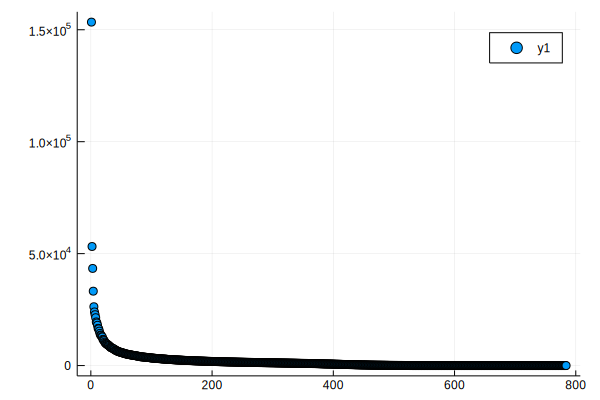

In [30]:
using Plots

scatter(Σ)

Let's look at the "average 0":

In [31]:
function normalize_image(image)
    image2 = abs.(image)
    m = maximum(image2)
    image2 = image2 ./ m
    return Gray.(reshape(image2, 28, 28))
end

normalize_image (generic function with 1 method)

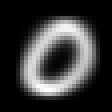

In [32]:
using Statistics

normalize_image(mean(matrix_0s, dims=2))

## Applying SVD to all images

In [33]:
big_image_matrix = reduce(hcat, vectorize.(training_images));

In [34]:
size(big_image_matrix)

(784, 50000)

In [35]:
big_image_matrix

784×50000 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0

## Extract data for each digit into separate matrices

In [36]:
single_digits = [ big_image_matrix[:, training_labels .== i] for i in 0:9 ]

10-element Array{Array{Int64,2},1}:
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]

In [37]:
Z = svd.(single_digits);

In [38]:
Us = first.(Z)

10-element Array{Array{Float64,2},1}:
 [-1.11022e-16 -8.32667e-17 … 0.263017 0.108898; 0.0 1.11022e-16 … 0.759198 -0.217008; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]      
 [3.33067e-16 2.22045e-16 … 0.12277 0.243441; 0.0 1.66533e-16 … 0.669715 0.0243274; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]         
 [2.22045e-16 -5.55112e-17 … 0.00295705 -0.607003; 0.0 1.94289e-16 … -0.518739 -0.190468; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]   
 [-1.11022e-16 -5.55112e-17 … 0.217468 -0.467104; 0.0 -2.77556e-16 … 0.00632763 0.044892; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]   
 [1.11022e-16 0.0 … -0.0842133 -0.364336; 0.0 1.249e-16 … -0.00156071 0.0946388; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]            
 [-3.33067e-16 -1.38778e-17 … -0.0427051 0.0213372; 0.0 -8.67362e-18 … 0.00325293 -0.281373; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [-1.11022e-16 -6.245e-17 … 0.413816 -0.033716; 0.0 3.46945e-17 … 0.0728744 -0.229194; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]      
 [0.0 1.66533e-16

In [39]:
using Statistics

In [40]:
U[:, 1]

784-element Array{Float64,1}:
 -1.1102230246251565e-16
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  ⋮                     
 -4.4300954484669486e-7 
 -3.839416055338021e-6  
  0.0                   
  0.0                   
  0.0                   
 -3.919018919865072e-6  
 -7.235111852058591e-6  
  0.0                   
  0.0                   
  0.0                   
  0.0                   
  0.0                   

In [41]:
norm(U[:, 1])

1.0000000000000004

In [42]:
show(U[:, 1])

[-1.11022e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.29612e-7, -3.66035e-6, 0.0, 0.0, 0.0, 0.0, 0.0, -2.14453e-6, -5.4438e-6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.93344e-6, -1.69527e-6, -8.79028e-6, 0.0, -5.53573e-6, -1.44148e-5, 0.0, 0.0, 0.0, 0.0, 0.0, -2.10329e-6, -3.75293e-6, -1.66112e-6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.21336e-6, -6.41111e-6, -1.55236e-5, -2.46301e-5, 0.0, -5.65138e-6, -2.41218e-6, -3.76726e-7, -9.35918e-6, -2.16633e-5, -2.17482e-5, -3.89486e-5, -1.94463e-5, -2.60095e-5, -4.87944e-5, -8.54256e-5, -0.000109922, -0.000149057, -0.000114416, -0.000112289, -6.30066e-5, -7.76734e-6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.63227e-7, -1.20028e-5, -1.64947e-5, -1.23905e-5, -5.31149e-5, -7.318e-5, -0.000105579, -0.000188515, -0.00035423, -0.000693559, -0.00124441, -0.002286

Thresholding an image:

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:θ=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
7,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07", "0.08", "0.09", "0.1", "0.11", "0.12"],:formatted_value=>Observable{String} with 1 listeners. Value:
"0.06",:value=>Observable{Float64} with 2 listeners. Value:
0.06), Observable{Float64} with 2 listeners. Value:
0.06, Scope("knockout-component-2f95cdda-4eb8-49bc-aea9-205f6a572629", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["θ"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>13,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07", "0.08", "0.09", "0.1", "0.11", "0.12"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"0.06", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
7, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/dpsanders/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"0.0\\\",\\\"0.01\\\",\\\"0.02\\\",\\\"0.03\\\",\\\"0.04\\\",\\\"0.05\\\",\\\"0.06\\\",\\\"0.07\\\",\\\"0.08\\\",\\\"0.09\\\",\\\"0.1\\\",\\
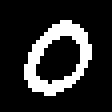
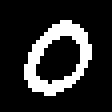

In [43]:
@manipulate for θ in 0.0:0.01:0.12
    image = abs.(U[:, 1]) .> θ
    Gray.(reshape(image, 28, 28))
end

In [44]:
Us

10-element Array{Array{Float64,2},1}:
 [-1.11022e-16 -8.32667e-17 … 0.263017 0.108898; 0.0 1.11022e-16 … 0.759198 -0.217008; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]      
 [3.33067e-16 2.22045e-16 … 0.12277 0.243441; 0.0 1.66533e-16 … 0.669715 0.0243274; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]         
 [2.22045e-16 -5.55112e-17 … 0.00295705 -0.607003; 0.0 1.94289e-16 … -0.518739 -0.190468; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]   
 [-1.11022e-16 -5.55112e-17 … 0.217468 -0.467104; 0.0 -2.77556e-16 … 0.00632763 0.044892; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]   
 [1.11022e-16 0.0 … -0.0842133 -0.364336; 0.0 1.249e-16 … -0.00156071 0.0946388; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]            
 [-3.33067e-16 -1.38778e-17 … -0.0427051 0.0213372; 0.0 -8.67362e-18 … 0.00325293 -0.281373; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [-1.11022e-16 -6.245e-17 … 0.413816 -0.033716; 0.0 3.46945e-17 … 0.0728744 -0.229194; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]      
 [0.0 1.66533e-16

Let's look at all the singular vectors for all images:

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:digit=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
0), Observable{Int64} with 2 listeners. Value:
0, Scope("knockout-component-f1d30701-0092-4dd6-bb5e-d3557069ecad", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>9,:min=>0,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
0, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/dpsanders/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":0}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-f1d30701-0092-4dd6-bb5e-d3557069ecad\",\"id\":\"ob_35\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-f1d30701-0092-4dd6-bb5e-d3557069ecad\",\"id\":\"ob_34\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n        \n    }
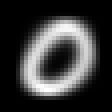
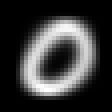

In [45]:
@manipulate for digit in slider(0:9, value=0), which_sing_vec in slider(1:10, value=1)

    image = Us[digit+1][:,which_sing_vec]    
   
    normalize_image(image)
end

## Predicting labels from images of digits


Let's use the SVD to try to **predict** a label for an image that we haven't seen yet:

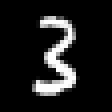

In [46]:
image = images[training_size + 1]   # was not included in the training

In [47]:
M = [U[:,1:3] for U in Us]  # first n sing vecs for each digit

10-element Array{Array{Float64,2},1}:
 [-1.11022e-16 -8.32667e-17 -1.80411e-16; 0.0 1.11022e-16 -2.77556e-17; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]
 [3.33067e-16 2.22045e-16 -1.38778e-16; 0.0 1.66533e-16 1.11022e-16; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]   
 [2.22045e-16 -5.55112e-17 5.55112e-17; 0.0 1.94289e-16 -5.55112e-17; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]  
 [-1.11022e-16 -5.55112e-17 5.55112e-17; 0.0 -2.77556e-16 2.22045e-16; … ; 0.0 0.0 0.0; 0.0 0.0 0.0] 
 [1.11022e-16 0.0 1.94289e-16; 0.0 1.249e-16 -1.66533e-16; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]             
 [-3.33067e-16 -1.38778e-17 5.55112e-17; 0.0 -8.67362e-18 -1.94289e-16; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]
 [-1.11022e-16 -6.245e-17 -6.93889e-17; 0.0 3.46945e-17 -1.94289e-16; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]  
 [0.0 1.66533e-16 0.0; 0.0 -1.66533e-16 0.0; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]                           
 [2.22045e-16 5.55112e-17 -8.32667e-17; 0.0 -2.77556e-16 2.498e-16; … ; 0.0 0.0 0.0; 0.0 0.0 0.0]    
 [1.11022e-16 -1.94289e-16 1.38778e-16; 0.0 

In [48]:
first_sing_vecs = reduce(hcat, [U[:,1] for U in Us])

784×10 Array{Float64,2}:
 -1.11022e-16   3.33067e-16   2.22045e-16  …  2.22045e-16  1.11022e-16
  0.0           0.0           0.0             0.0          0.0        
  0.0           0.0           0.0             0.0          0.0        
  0.0           0.0           0.0             0.0          0.0        
  0.0           0.0           0.0             0.0          0.0        
  0.0           0.0           0.0          …  0.0          0.0        
  0.0           0.0           0.0             0.0          0.0        
  0.0           0.0           0.0             0.0          0.0        
  0.0           0.0           0.0             0.0          0.0        
  0.0           0.0           0.0             0.0          0.0        
  0.0           0.0           0.0          …  0.0          0.0        
  0.0           0.0           0.0             0.0          0.0        
  0.0           0.0           0.0             0.0          0.0        
  ⋮                                        ⋱        

In [49]:
my_softmax(v) = exp.(v) / sum(exp.(v))

my_softmax (generic function with 1 method)

In [50]:
v = abs.(first_sing_vecs' * vec(Float64.(image)))

my_softmax(v)

10-element Array{Float64,1}:
 0.03382072710940378 
 0.15392804472033755 
 0.12316884381500334 
 0.2824501000116202  
 0.027879155990251033
 0.12441004437229447 
 0.0474266712208733  
 0.02423256810297591 
 0.1465310863057624  
 0.0361527583514779  

In [51]:
M = [U[:, 1:1] for U in Us]  # first n sing vecs for each digit

my_softmax(norm.([MM' * vec(Float64.(image)) for MM in M]))

10-element Array{Float64,1}:
 0.033820727109403786
 0.15392804472033758 
 0.12316884381500348 
 0.28245010001161996 
 0.027879155990251016
 0.1244100443722945  
 0.04742667122087331 
 0.024232568102975912
 0.14653108630576242 
 0.03615275835147791 

In [52]:
@manipulate for num_sing_vecs in 1:784

    M = [U[:, 1:num_sing_vecs] for U in Us]  # first n sing vecs for each digit

    v = my_softmax(norm.([MM' * vec(Float64.(image)) for MM in M]))
    
    hbox(v, plot(0:9, v, m=:o), findmax(v))
    
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:num_sing_vecs=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
392), Observable{Int64} with 2 listeners. Value:
392, Scope("knockout-component-5c69dd0e-8de9-45e7-bd77-c7eaf47b07d7", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["num_sing_vecs"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>784,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
392, nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/dpsanders/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/all.js", "/Users/dpsanders/.julia/packages/InteractBase/PTCUD/src/../assets/style.css", "/Users/dpsanders/.julia/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":392}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-5c69dd0e-8de9-45e7-bd77-c7eaf47b07d7\",\"id\":\"ob_42\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-5c69dd0e-8de9-45e7-bd77-c7eaf47b07d7\",\"id\":\"ob_41\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false

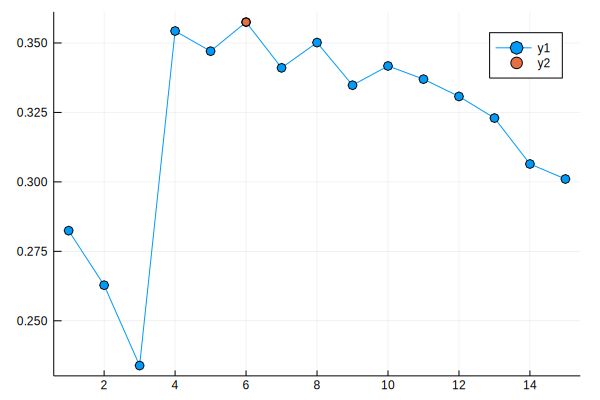

In [53]:
data = []

for num_sing_vecs in 1:15

    M = [U[:, 1:num_sing_vecs] for U in Us]  # first n sing vecs for each digit

    v = my_softmax(norm.([MM' * vec(Float64.(image)) for MM in M]))
    
    push!(data, v[4])
end

plot(data, m=:o)
scatter!([argmax(data)], [maximum(data)])
    

In [54]:
argmax(data)

6

In [55]:
softmax(norm.([MM' * vec(Float64.(image)) for MM in M]))

10-element Array{Float64,1}:
 0.06244873229934407 
 0.08153335605992665 
 0.14844813863333253 
 0.3010347736526581  
 0.0248050897247611  
 0.11181027499468853 
 0.06919557999052471 
 0.025800589190491042
 0.13536138735349518 
 0.03956207810077807 

In [56]:
vec(images[1])